#Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#The Dataset

In [2]:
dataset = pd.read_csv('kidney_disease.csv')
dataset.head()
#dataset.info()
#dataset.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


#Exploratory Data Analysis and Missing Data Handling

Visualizing the missing data heatmap

<Figure size 720x432 with 0 Axes>

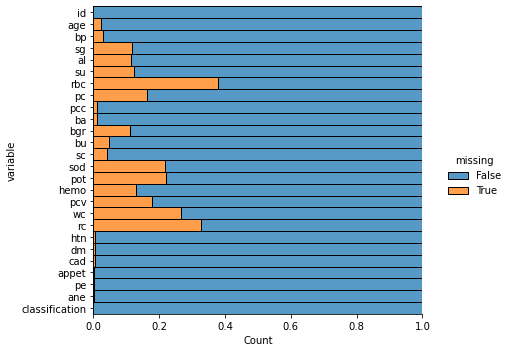

In [3]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

<AxesSubplot:>

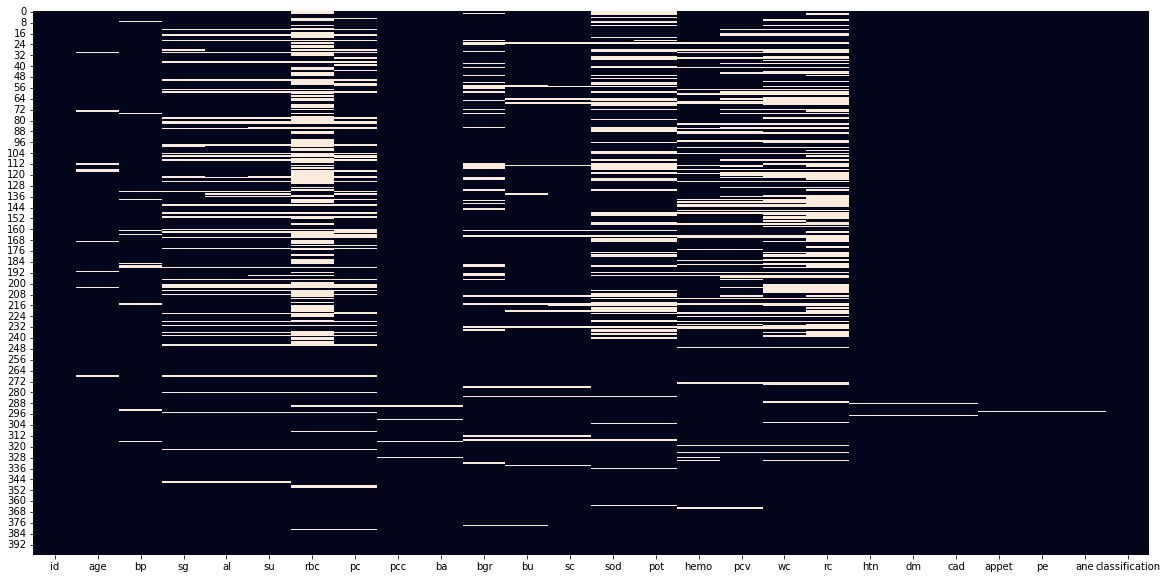

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.isnull(), cbar=False)

Finding the percentage of missing data for each attribute

In [5]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                   column_name  percent_missing
id                          id             0.00
age                        age             2.25
bp                          bp             3.00
sg                          sg            11.75
al                          al            11.50
su                          su            12.25
rbc                        rbc            38.00
pc                          pc            16.25
pcc                        pcc             1.00
ba                          ba             1.00
bgr                        bgr            11.00
bu                          bu             4.75
sc                          sc             4.25
sod                        sod            21.75
pot                        pot            22.00
hemo                      hemo            13.00
pcv                        pcv            17.75
wc                          wc            26.50
rc                          rc            32.75
htn                        htn          

Dropping the columns with more than 20% missing value

In [6]:
dataset = dataset.dropna(thresh=0.8*len(dataset), axis=1)
dataset

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,0.8,11.3,38.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1.4,11.6,35.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,0.5,15.7,47.0,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1.2,16.5,54.0,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,0.6,15.8,49.0,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1.0,14.2,51.0,no,no,no,good,no,no,notckd


In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset.iloc[:,6] = label.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7] = label.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8] = label.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,14] = label.fit_transform(dataset.iloc[:,14])
dataset.iloc[:,15] = label.fit_transform(dataset.iloc[:,15])
dataset.iloc[:,16] = label.fit_transform(dataset.iloc[:,16])
dataset.iloc[:,17] = label.fit_transform(dataset.iloc[:,17])
dataset.iloc[:,18] = label.fit_transform(dataset.iloc[:,18])
dataset.iloc[:,19] = label.fit_transform(dataset.iloc[:,19])
dataset.iloc[:,20] = label.fit_transform(dataset.iloc[:,20])

dataset.drop('id', axis=1, inplace=True)

In [8]:
dataset.head()
dataset['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [9]:
column_names = dataset.columns

Correlation among the features

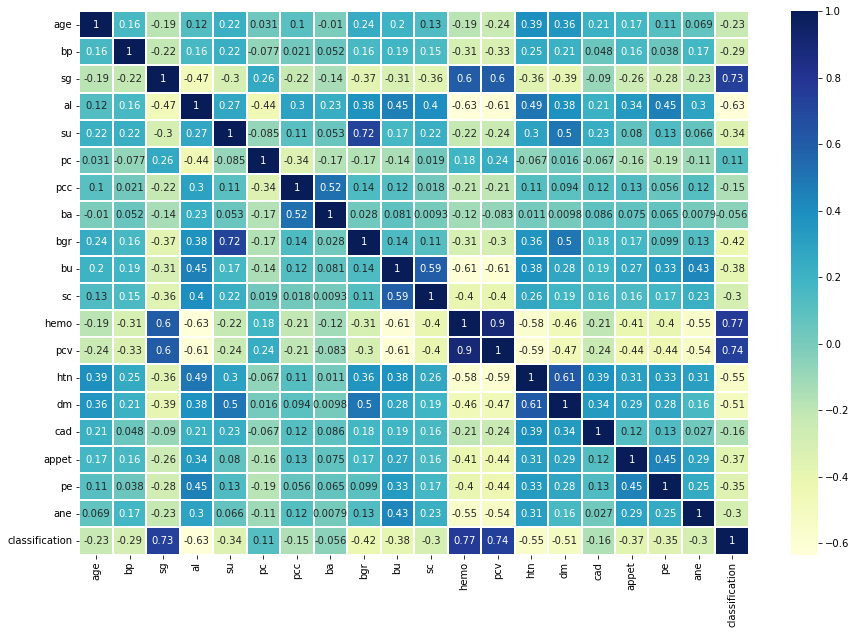

In [10]:
plt.figure(figsize=(15,10))
corr = dataset.corr()
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Comparing the distribution of highly correlated attributes i.e., correlation above 0.5

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


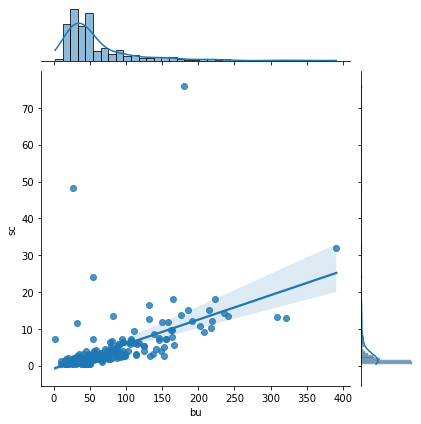

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


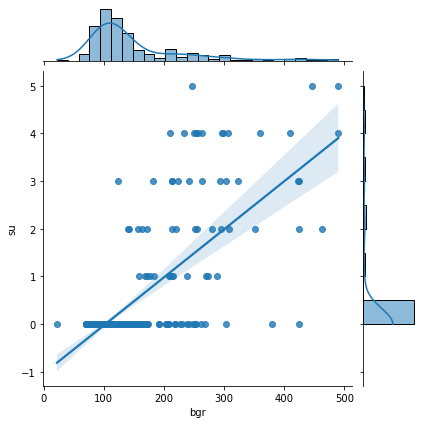

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


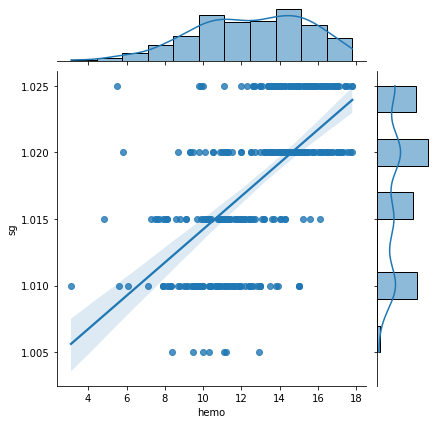

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


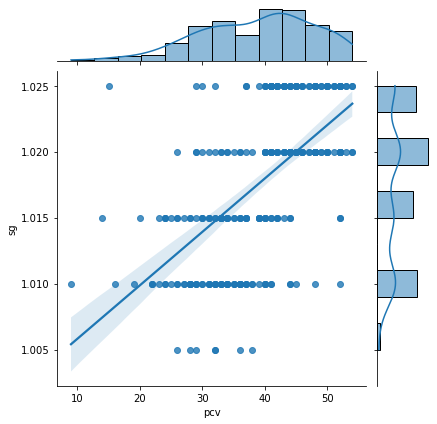

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


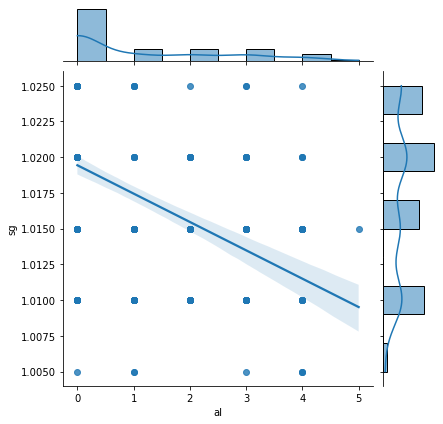

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


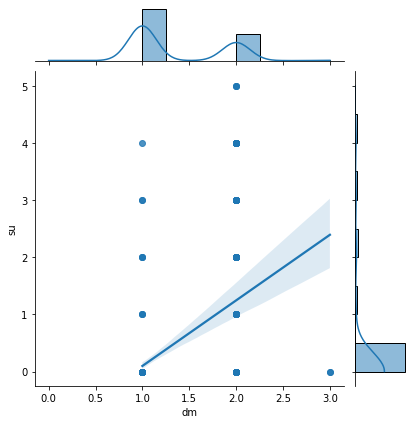

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


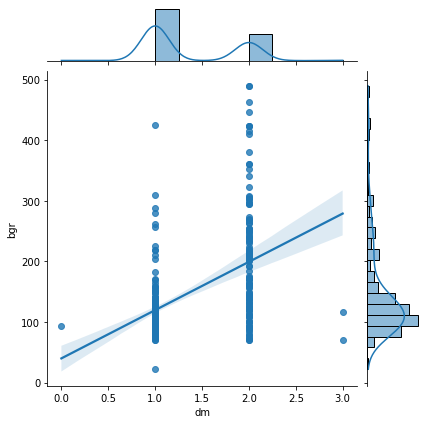

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


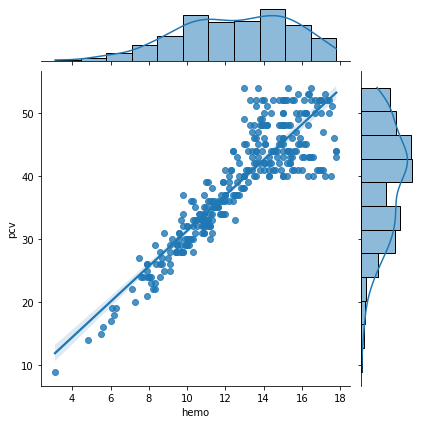

In [11]:
sns.jointplot(dataset['bu'], dataset['sc'], kind='reg')
plt.show()
sns.jointplot(dataset['bgr'], dataset['su'], kind='reg')
plt.show()
sns.jointplot(dataset['hemo'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['pcv'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['al'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['dm'], dataset['su'], kind='reg')
plt.show()
sns.jointplot(dataset['dm'], dataset['bgr'], kind='reg')
plt.show()
sns.jointplot(dataset['hemo'], dataset['pcv'], kind='reg')
plt.show()

The following figure shows that there is somewhat a class imbalance problem. So, evaluating with accuracy may not be appropriate.

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

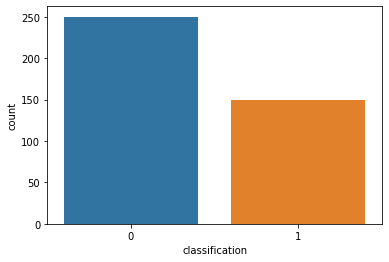

In [12]:
sns.countplot('classification', data = dataset)
#plt.savefig('before_smote.pdf')

Filling missing values

Taking care of missing data by using K Nearest Neighbour Imputation Algorithm

In [13]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
print(y.shape)

(400, 1)


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=7)
X = imputer.fit_transform(X)

In [15]:
dataset

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,44.0,1,2,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,0,0,NaN,18.0,0.8,11.3,38.0,0,1,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,31.0,0,2,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,32.0,1,1,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,35.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,0.5,15.7,47.0,0,1,1,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,1.2,16.5,54.0,0,1,1,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,0.6,15.8,49.0,0,1,1,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,1.0,14.2,51.0,0,1,1,0,0,0,1


<Figure size 720x432 with 0 Axes>

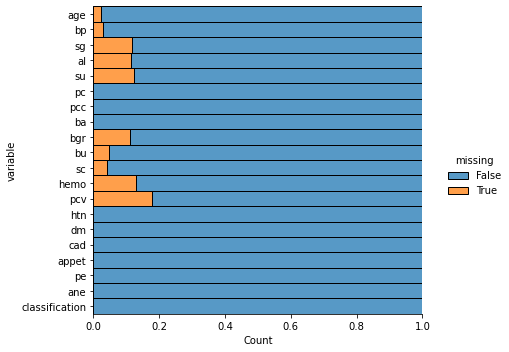

In [16]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig('missing_values.pdf')

<Figure size 720x432 with 0 Axes>

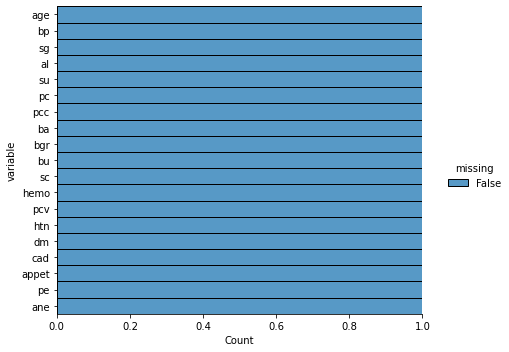

In [17]:
df = pd.DataFrame(X, columns=column_names[:-1])
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig('missing_filled.pdf')

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


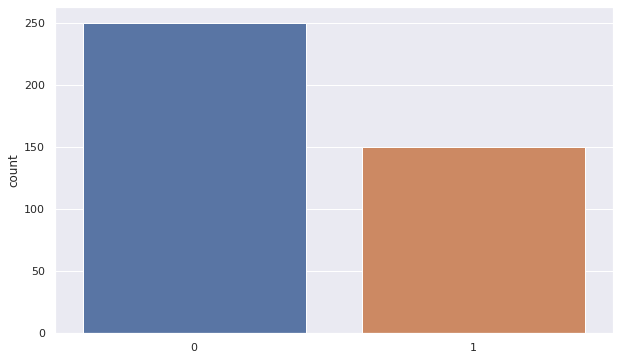

In [18]:
sns.set(rc = {'figure.figsize':(10,6)})
ax = sns.countplot('classification', data = dataset)
ax.set(xlabel=None)
plt.savefig('before_smote.pdf')

In [19]:
import imblearn
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [20]:
# from imblearn.over_sampling import SVMSMOTE
# ros = SVMSMOTE(k_neighbors=5)
# print(y.shape)
# X, y = ros.fit_resample(X, y)
# print(y.shape)
from imblearn.over_sampling import BorderlineSMOTE
ros = BorderlineSMOTE(k_neighbors=7, m_neighbors=12, random_state= 42)
X,y=ros.fit_resample(X,y)
print(X.shape)
print(y.shape)

(500, 19)
(500,)


In [21]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

/home/nsl50/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

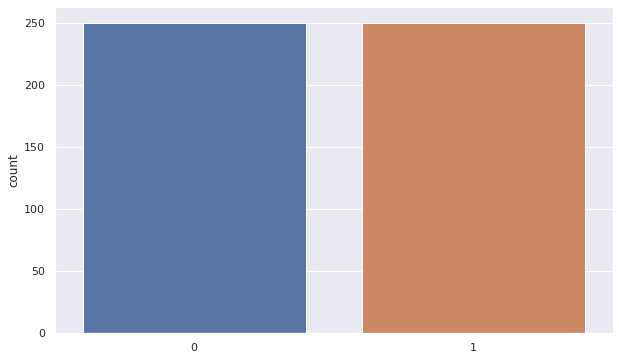

In [22]:
sns.countplot(y)
#plt.savefig('after_smote.pdf')

#Feature Selection

Strongly correlated features are selected here

In [23]:
df = pd.DataFrame(X, columns=column_names[:-1])
df.drop(['bp','pc','cad','ane','age','pcc','ba','pcv'], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      500 non-null    float64
 1   al      500 non-null    float64
 2   su      500 non-null    float64
 3   bgr     500 non-null    float64
 4   bu      500 non-null    float64
 5   sc      500 non-null    float64
 6   hemo    500 non-null    float64
 7   htn     500 non-null    float64
 8   dm      500 non-null    float64
 9   appet   500 non-null    float64
 10  pe      500 non-null    float64
dtypes: float64(11)
memory usage: 43.1 KB


,sg,al,su,bgr,bu,sc,hemo,htn,dm,appet,pe
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.018370,0.832333,0.374286,142.856309,53.830072,2.666805,13.064634,0.309779,1.285779,0.178837,0.166837
std,0.005466,1.221096,0.952510,69.614375,45.332829,5.125133,2.694791,0.474379,0.468313,0.396969,0.386933
min,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.000000,103.380814,28.000000,0.855477,11.200000,0.000000,1.000000,0.000000,0.000000
50%,1.020000,0.000000,0.000000,122.000000,42.103761,1.200000,13.597662,0.000000,1.000000,0.000000,0.000000
75%,1.024101,1.428571,0.000000,151.285970,56.000000,2.405005,15.000000,1.000000,2.000000,0.000000,0.000000
max,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,17.800000,2.000000,3.000000,2.000000,2.000000


Here are 10 features (sg, al, su, bgr, bu, sc, hemo, htn, dm, appet, pe)

In [24]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

      column_name  percent_missing
sg             sg              0.0
al             al              0.0
su             su              0.0
bgr           bgr              0.0
bu             bu              0.0
sc             sc              0.0
hemo         hemo              0.0
htn           htn              0.0
dm             dm              0.0
appet       appet              0.0
pe             pe              0.0


In [25]:
X = df.iloc[:,:].values

**Code for Cross validation**

In [26]:
print(X.shape)
print(y.shape)

(500, 11)
(500,)


In [27]:
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.15, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_Train = scaler.fit_transform(x_Train)
x_Test = scaler.transform(x_Test)

In [29]:
non_ckd = []
ckd = []
j=0
for i in y_Train:
  if i == 0:
    non_ckd.append(j)
  elif i == 1:
    ckd.append(j)
  j += 1
print(ckd)
len(ckd)

[0, 1, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 20, 22, 26, 28, 30, 33, 35, 39, 40, 41, 42, 45, 48, 49, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 69, 71, 72, 76, 78, 83, 85, 88, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 108, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 128, 130, 132, 134, 135, 138, 140, 144, 149, 150, 155, 157, 159, 160, 161, 164, 167, 168, 169, 170, 171, 175, 183, 187, 189, 190, 191, 194, 195, 197, 198, 202, 203, 204, 206, 211, 219, 220, 222, 223, 225, 226, 228, 229, 230, 234, 235, 240, 242, 245, 246, 247, 248, 249, 251, 253, 254, 255, 257, 259, 261, 262, 265, 266, 267, 268, 269, 271, 273, 274, 276, 278, 280, 283, 286, 287, 288, 292, 297, 300, 301, 303, 304, 305, 307, 308, 310, 312, 315, 317, 318, 320, 324, 326, 328, 329, 330, 331, 335, 336, 337, 338, 339, 342, 344, 345, 347, 348, 349, 350, 353, 354, 355, 356, 358, 360, 361, 363, 366, 375, 376, 377, 378, 379, 380, 382, 383, 386, 387, 388, 389, 392, 394, 395, 397, 400, 401, 403, 406, 407, 409, 412, 414, 417, 419

213

In [30]:
k1 = []
k2 = []
k3 = []
k4 = []
k5 = []
i = 0
k = 0
for j in range(0,425):
    if j < 85:
      if j % 2 == 0:
        k1.append(ckd[i])
        i += 1
      else:
        k1.append(non_ckd[k])
        k += 1

    elif j < 170:
      if j % 2 == 0:
        k2.append(ckd[i])
        i += 1
      else:
        k2.append(non_ckd[k])
        k += 1

    elif j < 255:
      if j % 2 == 0:
        k3.append(ckd[i])
        i += 1
      else:
        k3.append(non_ckd[k])
        k += 1

    elif j < 340:
      if j % 2 == 0:
        k4.append(ckd[i])
        i += 1
      else:
        k4.append(non_ckd[k])
        k += 1

    else:
      if j % 2 == 0:
        k5.append(ckd[i])
        i += 1
      else:
        k5.append(non_ckd[k])
        k += 1

In [31]:
Xtrain_cv1 = []
Xtrain_cv2 = []
Xtrain_cv3 = []
Xtrain_cv4 = []
Xtrain_cv5 = []
ytrain_cv1 = []
ytrain_cv2 = []
ytrain_cv3 = []
ytrain_cv4 = []
ytrain_cv5 = []
Xtest_cv1 = []
Xtest_cv2 = []
Xtest_cv3 = []
Xtest_cv4 = []
Xtest_cv5 = []
ytest_cv1 = []
ytest_cv2 = []
ytest_cv3 = []
ytest_cv4 = []
ytest_cv5 = []
z=0
for i in k5 + k2 + k3 + k4 + k1:
  if z < 340:
    Xtrain_cv5.append(x_Train[i])
    ytrain_cv5.append(y_Train[i])
    z += 1
  else:
    Xtest_cv5.append(x_Train[i])
    ytest_cv5.append(y_Train[i])
z =0

for i in k1 + k5 + k3 + k4 + k2:
  if z < 340:
    Xtrain_cv4.append(x_Train[i])
    ytrain_cv4.append(y_Train[i])
    z += 1
  else:
    Xtest_cv4.append(x_Train[i])
    ytest_cv4.append(y_Train[i])
z =0

for i in k1 + k2 + k5 + k4 + k3:
  if z < 340:
    Xtrain_cv3.append(x_Train[i])
    ytrain_cv3.append(y_Train[i])
    z += 1
  else:
    Xtest_cv3.append(x_Train[i])
    ytest_cv3.append(y_Train[i])
z =0

for i in k1 + k2 + k3 + k5 + k4:
  if z < 340:
    Xtrain_cv2.append(x_Train[i])
    ytrain_cv2.append(y_Train[i])
    z += 1
  else:
    Xtest_cv2.append(x_Train[i])
    ytest_cv2.append(y_Train[i])
z =0

for i in k1 + k2 + k3 + k4 + k5:
  if z < 340:
    Xtrain_cv1.append(x_Train[i])
    ytrain_cv1.append(y_Train[i])
    z += 1
  else:
    Xtest_cv1.append(x_Train[i])
    ytest_cv1.append(y_Train[i])

len(ytrain_cv2)

340

#Splitting and Scaling

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
def evaluation(cm):
  accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
  print("Accuracy : ", accuracy)
  precision = (cm[0,0])/(cm[0,0]+cm[1,0])
  print("Precision : ",precision)
  recall = (cm[0,0])/(cm[0,0]+cm[0,1])
  print("Recall : ",recall)
  F1 = (2*precision*recall)/(precision + recall)
  print("F1-score : ",F1)

  return (accuracy, precision, recall, F1)

#Nearest Neighbour Approach

Applying elbow method to get the best K for KNN

Text(0, 0.5, 'Mean Error')

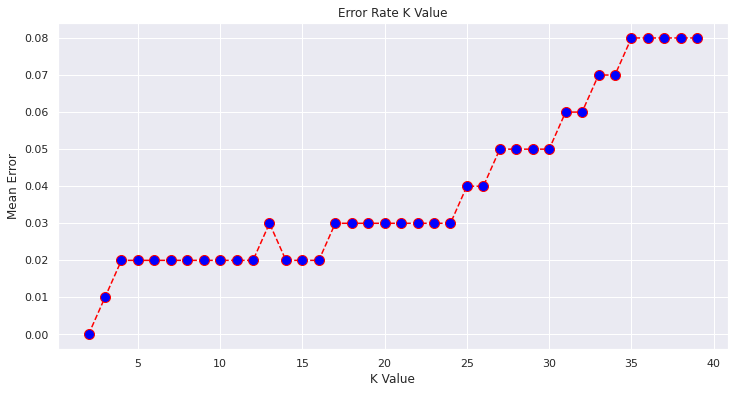

In [35]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Chosing 5 as the value of K

[[48  1]
 [ 1 50]]
0.98
              precision    recall  f1-score   support

           0     0.9796    0.9796    0.9796        49
           1     0.9804    0.9804    0.9804        51

    accuracy                         0.9800       100
   macro avg     0.9800    0.9800    0.9800       100
weighted avg     0.9800    0.9800    0.9800       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

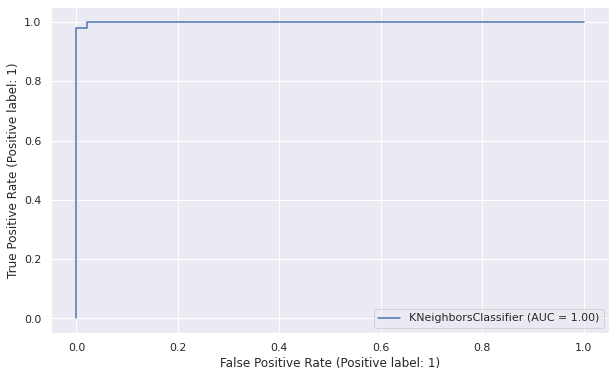

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
from sklearn import metrics
fig = plt.figure(figsize=(6,6))
metrics.plot_roc_curve(classifier, x_test, y_test) 
plt.show()
#y_pred = classifier.predict(user_input)
#y_pred

In [37]:
print(x_train.shape)
print(y_train.shape)
from sklearn.model_selection import GridSearchCV
k_range = list(range(3, 31))
param_grid = dict(n_neighbors=k_range)
logreg=KNeighborsClassifier()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
logreg_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred=logreg_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

(400, 11)
(400,)
tuned hpyerparameters :(best parameters)  {'n_neighbors': 3}
accuracy : 0.9799999999999999
[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        51

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [38]:
from statistics import mean
knn = KNeighborsClassifier(n_neighbors = 4)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
knn.fit(Xtrain_v, ytrain_v)
y_pred = knn.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
knn.fit(Xtrain_v, ytrain_v)
y_pred = knn.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
knn.fit(Xtrain_v, ytrain_v)
y_pred = knn.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
knn.fit(Xtrain_v, ytrain_v)
y_pred = knn.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
knn.fit(Xtrain_v, ytrain_v)
y_pred = knn.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))

Accuracy :  0.9764705882352941
Precision :  1.0
Recall :  0.9523809523809523
F1-score :  0.975609756097561
Accuracy :  0.9647058823529412
Precision :  0.9761904761904762
Recall :  0.9534883720930233
F1-score :  0.9647058823529412
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0
Accuracy :  0.9647058823529412
Precision :  0.9545454545454546
Recall :  0.9767441860465116
F1-score :  0.9655172413793104
Accuracy :  0.9764705882352941
Precision :  0.9545454545454546
Recall :  1.0
F1-score :  0.9767441860465117
-------------validation results---------
accuracy: 0.9764705882352941
precision: 0.9770562770562771
recall: 0.9765227021040974
f1 score: 0.9765154131752648


#Support vector machine approach

[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


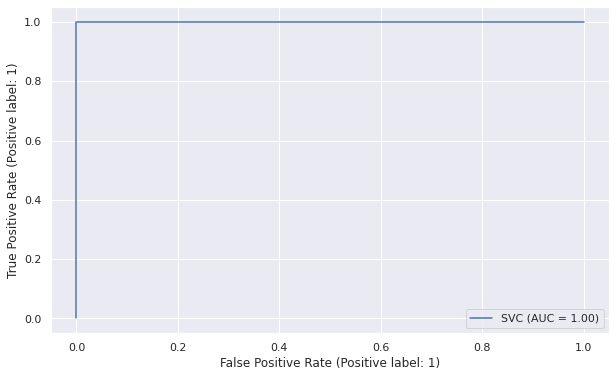

In [39]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(x_train, y_train)
y_pred = classifier3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier3, x_test, y_test) 
plt.show()

In [40]:
param_grid = {'kernel': ['linear', 'rbf'], 'C':[1,2,3,6]}
logreg=SVC()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
logreg_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred=logreg_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

tuned hpyerparameters :(best parameters)  {'C': 6, 'kernel': 'linear'}
accuracy : 0.9949999999999999
[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        51

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [41]:
classifier3 = SVC(kernel = 'rbf', gamma=0.05, random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier3.fit(Xtrain_v, ytrain_v)
y_pred = classifier3.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier3.fit(Xtrain_v, ytrain_v)
y_pred = classifier3.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier3.fit(Xtrain_v, ytrain_v)
y_pred = classifier3.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier3.fit(Xtrain_v, ytrain_v)
y_pred = classifier3.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier3.fit(Xtrain_v, ytrain_v)
y_pred = classifier3.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))


Accuracy :  0.9529411764705882
Precision :  1.0
Recall :  0.9047619047619048
F1-score :  0.9500000000000001
Accuracy :  0.9882352941176471
Precision :  1.0
Recall :  0.9767441860465116
F1-score :  0.988235294117647
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0
Accuracy :  0.9647058823529412
Precision :  1.0
Recall :  0.9302325581395349
F1-score :  0.963855421686747
Accuracy :  0.9764705882352941
Precision :  0.9545454545454546
Recall :  1.0
F1-score :  0.9767441860465117
-------------validation results---------
accuracy: 0.9764705882352941
precision: 0.990909090909091
recall: 0.9623477297895903
f1 score: 0.9757669803701812


#Bayesian Approach

Gaussian Naive Bayes

[[44  5]
 [ 3 48]]
0.92
              precision    recall  f1-score   support

           0     0.9362    0.8980    0.9167        49
           1     0.9057    0.9412    0.9231        51

    accuracy                         0.9200       100
   macro avg     0.9209    0.9196    0.9199       100
weighted avg     0.9206    0.9200    0.9199       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


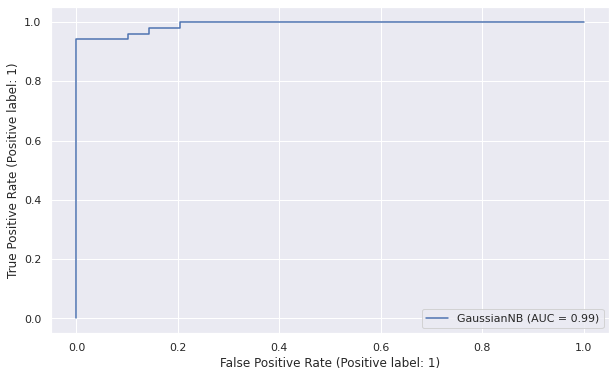

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)
y_pred = classifier4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier4, x_test, y_test) 
plt.show()

In [43]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
logreg=GaussianNB()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
logreg_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred=logreg_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

tuned hpyerparameters :(best parameters)  {'var_smoothing': 0.008111308307896872}
accuracy : 0.9575000000000001
[[44  5]
 [ 2 49]]
0.93
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        49
           1       0.91      0.96      0.93        51

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [44]:
classifier4 = GaussianNB()
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier4.fit(Xtrain_v, ytrain_v)
y_pred = classifier4.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier4.fit(Xtrain_v, ytrain_v)
y_pred = classifier4.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier4.fit(Xtrain_v, ytrain_v)
y_pred = classifier4.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier4.fit(Xtrain_v, ytrain_v)
y_pred = classifier4.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier4.fit(Xtrain_v, ytrain_v)
y_pred = classifier4.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))

Accuracy :  0.9411764705882353
Precision :  0.9743589743589743
Recall :  0.9047619047619048
F1-score :  0.9382716049382716
Accuracy :  0.9764705882352941
Precision :  0.9767441860465116
Recall :  0.9767441860465116
F1-score :  0.9767441860465116
Accuracy :  0.9176470588235294
Precision :  0.9487179487179487
Recall :  0.8809523809523809
F1-score :  0.9135802469135802
Accuracy :  0.9529411764705882
Precision :  0.9534883720930233
Recall :  0.9534883720930233
F1-score :  0.9534883720930233
Accuracy :  0.9294117647058824
Precision :  0.8913043478260869
Recall :  0.9761904761904762
F1-score :  0.9318181818181818
-------------validation results---------
accuracy: 0.9435294117647058
precision: 0.948922765808509
recall: 0.9384274640088593
f1 score: 0.9427805183619137


#Tree based approach

[[48  1]
 [ 2 49]]
0.97
              precision    recall  f1-score   support

           0     0.9600    0.9796    0.9697        49
           1     0.9800    0.9608    0.9703        51

    accuracy                         0.9700       100
   macro avg     0.9700    0.9702    0.9700       100
weighted avg     0.9702    0.9700    0.9700       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


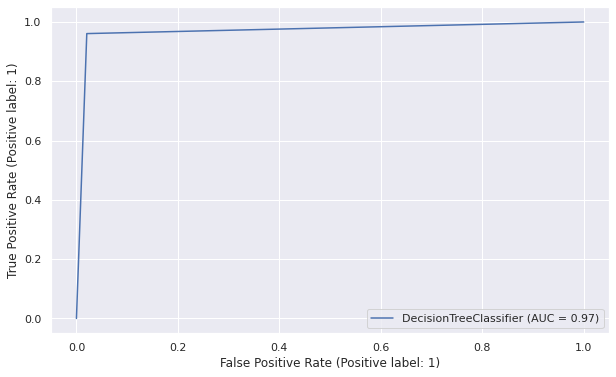

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier5.fit(x_train, y_train)
y_pred = classifier5.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier5, x_test, y_test) 
plt.show()

In [46]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1,10),
              'splitter' : ['best', 'random'],
              'min_samples_split': range(1,10),
              'min_samples_leaf': range(1,5)}
logreg=DecisionTreeClassifier()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
logreg_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred=logreg_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.99
[[48  1]
 [ 2 49]]
0.97
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.98      0.96      0.97        51

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  File "/home/nsl50/anaconda3/lib/python3.9/site-pack

In [47]:
classifier5 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier5.fit(Xtrain_v, ytrain_v)
y_pred = classifier5.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier5.fit(Xtrain_v, ytrain_v)
y_pred = classifier5.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier5.fit(Xtrain_v, ytrain_v)
y_pred = classifier5.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier5.fit(Xtrain_v, ytrain_v)
y_pred = classifier5.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier5.fit(Xtrain_v, ytrain_v)
y_pred = classifier5.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))

Accuracy :  0.9647058823529412
Precision :  0.975609756097561
Recall :  0.9523809523809523
F1-score :  0.963855421686747
Accuracy :  0.9529411764705882
Precision :  0.9534883720930233
Recall :  0.9534883720930233
F1-score :  0.9534883720930233
Accuracy :  0.9176470588235294
Precision :  0.9487179487179487
Recall :  0.8809523809523809
F1-score :  0.9135802469135802
Accuracy :  0.9882352941176471
Precision :  1.0
Recall :  0.9767441860465116
F1-score :  0.988235294117647
Accuracy :  0.9764705882352941
Precision :  0.9545454545454546
Recall :  1.0
F1-score :  0.9767441860465117
-------------validation results---------
accuracy: 0.96
precision: 0.9664723062907975
recall: 0.9527131782945736
f1 score: 0.9591807041715018


In [48]:
# from sklearn import tree
# import graphviz 
# dot_data = tree.export_graphviz(classifier5, out_file=None, 
#                       max_depth = 2, 
#                       feature_names=df.columns,
#                       class_names=['0', '1'],  
#                       filled=True, rounded=True,  
#                       special_characters=True,)
# graph = graphviz.Source(dot_data)  
# graph 

#Linear Models

[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


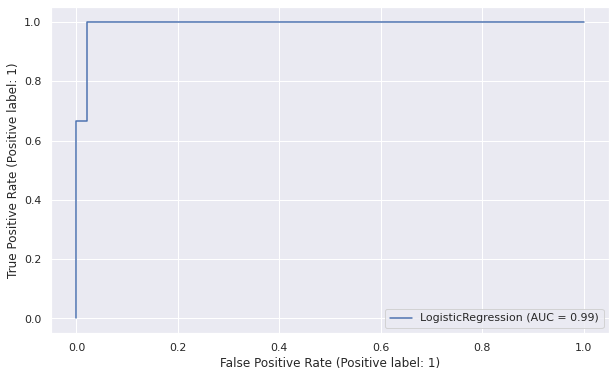

In [49]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression(random_state = 0)
classifier7.fit(x_train, y_train)
y_pred = classifier7.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier7, x_test, y_test) 
plt.show()

In [50]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' : ['newton-cg', 'lbfgs', 'liblinear']
            }
logreg=LogisticRegression()
#cv mans cross_validation
logreg_cv = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
logreg_cv.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

y_pred=logreg_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9949999999999999
[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        51

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/nsl50/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solv

In [51]:
classifier7 = LogisticRegression(tol=0.00001, random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier7.fit(Xtrain_v, ytrain_v)
y_pred = classifier7.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier7.fit(Xtrain_v, ytrain_v)
y_pred = classifier7.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier7.fit(Xtrain_v, ytrain_v)
y_pred = classifier7.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier7.fit(Xtrain_v, ytrain_v)
y_pred = classifier7.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier7.fit(Xtrain_v, ytrain_v)
y_pred = classifier7.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))

Accuracy :  0.9647058823529412
Precision :  1.0
Recall :  0.9285714285714286
F1-score :  0.962962962962963
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0
Accuracy :  0.9882352941176471
Precision :  1.0
Recall :  0.9761904761904762
F1-score :  0.9879518072289156
Accuracy :  0.9647058823529412
Precision :  1.0
Recall :  0.9302325581395349
F1-score :  0.963855421686747
Accuracy :  0.9764705882352941
Precision :  0.9545454545454546
Recall :  1.0
F1-score :  0.9767441860465117
-------------validation results---------
accuracy: 0.9788235294117648
precision: 0.990909090909091
recall: 0.9669988925802879
f1 score: 0.9783028755850275




# Voting with K-fold

In [52]:
print(X.shape)
print(y.shape)

(500, 11)
(500,)


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [54]:
non_ckd = []
ckd = []
j=0
for i in y_train:
  if i == 0:
    non_ckd.append(j)
  elif i == 1:
    ckd.append(j)
  j += 1
print(ckd)
len(ckd)

[0, 1, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 20, 22, 26, 28, 30, 33, 35, 39, 40, 41, 42, 45, 48, 49, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 69, 71, 72, 76, 78, 83, 85, 88, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 108, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 128, 130, 132, 134, 135, 138, 140, 144, 149, 150, 155, 157, 159, 160, 161, 164, 167, 168, 169, 170, 171, 175, 183, 187, 189, 190, 191, 194, 195, 197, 198, 202, 203, 204, 206, 211, 219, 220, 222, 223, 225, 226, 228, 229, 230, 234, 235, 240, 242, 245, 246, 247, 248, 249, 251, 253, 254, 255, 257, 259, 261, 262, 265, 266, 267, 268, 269, 271, 273, 274, 276, 278, 280, 283, 286, 287, 288, 292, 297, 300, 301, 303, 304, 305, 307, 308, 310, 312, 315, 317, 318, 320, 324, 326, 328, 329, 330, 331, 335, 336, 337, 338, 339, 342, 344, 345, 347, 348, 349, 350, 353, 354, 355, 356, 358, 360, 361, 363, 366, 375, 376, 377, 378, 379, 380, 382, 383, 386, 387, 388, 389, 392, 394, 395, 397, 400, 401, 403, 406, 407, 409, 412, 414, 417, 419

213

In [55]:
k1 = []
k2 = []
k3 = []
k4 = []
k5 = []
i = 0
k = 0
for j in range(0,425):
    if j < 85:
      if j % 2 == 0:
        k1.append(ckd[i])
        i += 1
      else:
        k1.append(non_ckd[k])
        k += 1

    elif j < 170:
      if j % 2 == 0:
        k2.append(ckd[i])
        i += 1
      else:
        k2.append(non_ckd[k])
        k += 1

    elif j < 255:
      if j % 2 == 0:
        k3.append(ckd[i])
        i += 1
      else:
        k3.append(non_ckd[k])
        k += 1

    elif j < 340:
      if j % 2 == 0:
        k4.append(ckd[i])
        i += 1
      else:
        k4.append(non_ckd[k])
        k += 1

    else:
      if j % 2 == 0:
        k5.append(ckd[i])
        i += 1
      else:
        k5.append(non_ckd[k])
        k += 1

In [56]:
Xtrain_cv1 = []
Xtrain_cv2 = []
Xtrain_cv3 = []
Xtrain_cv4 = []
Xtrain_cv5 = []
ytrain_cv1 = []
ytrain_cv2 = []
ytrain_cv3 = []
ytrain_cv4 = []
ytrain_cv5 = []
Xtest_cv1 = []
Xtest_cv2 = []
Xtest_cv3 = []
Xtest_cv4 = []
Xtest_cv5 = []
ytest_cv1 = []
ytest_cv2 = []
ytest_cv3 = []
ytest_cv4 = []
ytest_cv5 = []
z=0
for i in k5 + k2 + k3 + k4 + k1:
  if z < 340:
    Xtrain_cv5.append(x_train[i])
    ytrain_cv5.append(y_train[i])
    z += 1
  else:
    Xtest_cv5.append(x_train[i])
    ytest_cv5.append(y_train[i])
z =0

for i in k1 + k5 + k3 + k4 + k2:
  if z < 340:
    Xtrain_cv4.append(x_train[i])
    ytrain_cv4.append(y_train[i])
    z += 1
  else:
    Xtest_cv4.append(x_train[i])
    ytest_cv4.append(y_train[i])
z =0

for i in k1 + k2 + k5 + k4 + k3:
  if z < 340:
    Xtrain_cv3.append(x_train[i])
    ytrain_cv3.append(y_train[i])
    z += 1
  else:
    Xtest_cv3.append(x_train[i])
    ytest_cv3.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k5 + k4:
  if z < 340:
    Xtrain_cv2.append(x_train[i])
    ytrain_cv2.append(y_train[i])
    z += 1
  else:
    Xtest_cv2.append(x_train[i])
    ytest_cv2.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k4 + k5:
  if z < 340:
    Xtrain_cv1.append(x_train[i])
    ytrain_cv1.append(y_train[i])
    z += 1
  else:
    Xtest_cv1.append(x_train[i])
    ytest_cv1.append(y_train[i])

len(ytrain_cv2)

340

In [57]:
from sklearn.model_selection import KFold
from statistics import mean
knn = KNeighborsClassifier(n_neighbors = 4)
svm_rbf = SVC(kernel = 'linear', probability=True , random_state = 0)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
lr = LogisticRegression(random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
classifier_v = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('gnb',gNB), ('dt',dt), ('lr',lr)], voting='soft').fit(x_train,y_train)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
acm = confusion_matrix(ytest_v, y_pred)
(accuracy, Precision, recall, F1) = evaluation(acm)
result_accuracy.append(accuracy)
result_precision.append(Precision)
result_recall.append(recall)
result_f1.append(F1)

print('-------------validation results---------')
print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))


NameError: name 'VotingClassifier' is not defined

In [ ]:
y_pred_test = classifier_v.predict(x_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 4))